# Teori dan Praktek Alokasi Aset Portfolio yang Optimal

## Referensi dan Atribusi

Materi dari studi ini diambil dari minggu kedua kursus [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python).

Sumber-sumber lain:

- [Efficient frontier](https://www.investopedia.com/terms/e/efficientfrontier.asp) - Investopedia

## *Return* dan Volatilitas dari Portfolio

### Portfolio dengan Dua Aset

Misalkan kita membangun portfolio yang berisi dua aset, yaitu aset A dan aset B. *Return*, volatilitas (dalam hal ini standard deviasi), dan alokasi (*weight*) masing-masing aset direpresentasikan dengan ***R***, ***σ***, dan ***w***.

Maka *return* portfolio adalah *weighted average* dari masing-masing *return*:

$$ R(w_A, w_B) = w_A \times R_A + w_B \times R_B $$

Sedangkan untuk volatilitas, nilainya tergantung dari korelasi antar aset. Kalau aset-asetnya berkorelasi sempurna, maka pada dasarnya aset-aset tersebut akan bergerak secara seragam, sehingga volatilitasnya adalah semacam rata-rata dari volatilitas aset-aset tersebut. Semakin rendah korelasinya, maka volatilitas dari portfolio akan semakin rendah juga, sampai pada suatu titik ketika korelasi antara A dan B cukup rendah sehingga bahkan volatilitas dari portfolio lebih rendah dari volatilitas baik A atau B!

Perhitungan untuk volatility adalah sbb:

$$ \sigma^2(w_A, w_B) = \sigma_A^2 w_A^2 + \sigma_B^2 w_B^2 + 2 w_A w_B \sigma_A \sigma_B \rho_{A,B} $$

dimana $\rho_{A,B}$ adalah korelasi dari A dan B.

### Portfolio dengan Beberapa Aset

Men-generalisasi formula di bagian sebelumnya, kalau portfolio berisi lebih dari dua aset, maka *return*-nya adalah:

$$ R_p = \sum_{i=1}^{k} w_i R_o $$

Sedangkan volatilitasnya adalah:

$$ \sigma_p^2 = \sum_{i=1}^{k} \sum_{j=1}^{k} w_i w_j \sigma_i \sigma_j \rho_{i, j} $$

Volatilitas dari aset *i* dikali volatilitas dari aset *j* dikali korelasi dari aset *i* dan *j* adalah ***covariance*** dari aset *i* dan *j*, sehingga persamaan di atas bisa disederhanakan menjadi:

$$ \sigma_p^2 = \sum_{i=1}^{k} \sum_{j=1}^{k} w_i w_j \sigma_{i, j} $$

Di mana $\sigma_{i,i}$ adalah ***covariance*** dari aset *i* dan *j*. Sebagai tambahan info, $\sigma_{i,i}$ adalah *variance* dari aset *i* (karena $\sigma_{i,i} = \sigma_i \sigma_i \rho_{i,i}$ dan $\rho_{i,i}$ tentunya adalah 1).

### Notasi Matriks

*Return* dari portfolio dengan menggunakan notasi matriks:

$$ R_p = w^T R $$

Sedangkan perhitungan volatilitas dari portfolio dapat disederhanakan menjadi:

$$ \sigma_p^2 = w^T \Sigma w $$

dimana $\Sigma$ bukan notasi sum tapi adalah *covariance* matriks.

## Efficient Frontier

[*Efficient frontier*](https://www.investopedia.com/terms/e/efficientfrontier.asp) yang ditemukan oleh pemenang Nobel Harry Markowitz di 1952, adalah kumpulan portfolio yang memberikan "performansi" yang paling optimal, yaitu memberikan *return* tertinggi untuk suatu resiko yang telah ditentukan, atau sebaliknya, resiko terendah untuk suatu *return* yang telah ditentukan.

*Efficient frontier* sering digambarkan sebagai kurva seperti di bawah ini.

![Kurva Efficient Frontier](10021-efficient-frontier.png)

Sumbu X adalah resiko, dan sumbu Y adalah return. Untuk suatu pilihan aset-aset, kombinasi yang melambangkan *efficient frontier* dilambangkan dengan kurva garis merah. Kombinasi lain dari aset-aset yang menyimpang dari *efficient frontier* bukanlah kombinasi yang bagus. Misalnya, ambil titik A, yang melambangkan suatu portfolio dengan kombinasi alokasi aset-aset tertentu. Kita tidak akan mau memilih portfolio A ini, karena ada portfolio lain (artinya dengan menggunakan kombinasi alokasi aset yang berbeda) dimana untuk resiko yang sama kita bisa mendapatkan return yang lebih tinggi (yaitu titik B), atau dengan return yang sama kita bisa mendapatkan resiko yang lebih rendah (titik C).

## Demo Menghitung Return dan Volatilitas Portfolio

Kali ini kita akan mendemonstrasikan perhitungan return dan volatilitas dari portfolio. Data yang digunakan adalah data *return* bulanan beberapa industri/sektor mulai dari tahun 1926 sampai 2018. Data ini saya ambil dari kursus [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python) oleh Vijay Vaidyanathan. Datanya sendiri bersumber dari dan hak cipta oleh [Kenneth French](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [24]:
import pandas as pd
import numpy as np

%matplotlib inline

# Load data returns dari sektor2
ind = pd.read_csv("ind30_m_vw_rets.csv", header=0, index_col=0)/100

# Ubah index jadi perioda bulanan
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

# Hilangkan spasi pada kolom
ind.columns = ind.columns.str.strip()

# Batasi lingkup agar sama dengan di MOOC
ind = ind["1996":"2000"]

# Konversi returns menjadi tahunan. "er" adalah expected return
compounded_growth = (1+ind).prod()
er = compounded_growth ** (12/ind.shape[0]) -1
print('Expected returns:')
print(er)

Expected returns:
Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64


Kita buat *covariance matrix*-nya.

In [2]:
# Covariance matrix
cov = ind.cov()

Agar lebih sederhana, kita pilih 4 industri saja dalam portfolio kita.

In [3]:
assets = ['Food', 'Beer', 'Smoke', 'Coal']

Expected returns dan covariance matrix untuk aset-aset ini:

In [4]:
er[assets]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[assets, assets]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


Mari membuat fungsi untuk menghitung *expected return* dan volatilitas dari portfolio dengan operasi matriks seperti dijelaskan di atas.

In [6]:
def portfolio_return(weights, returns):
    return weights.T @ returns


def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

Misalkan 4 aset tadi kita alokasikan secara seimbang:

In [7]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

Kita bisa hitung expected return dari portfolionya dengan alokasi ini:

In [8]:
portfolio_return(weights, er[assets])

0.19511097196038385

Dan juga volatilitasnya:

In [9]:
portfolio_vol(weights, cov.loc[assets, assets])

0.055059195776437045

## Praktek Efficient Frontier dengan 2 Aset

Agar lebih sederhana dalam pengaturan alokasi aset untuk portfolio, kita pilih hanya 2 aset saja. Kita akan mem-plot risk vs return dari beberapa kombinasi alokasi (*weight*).

In [10]:
# Pilih 2 aset
assets = ['Games', 'Fin']

# Generate kombinasi alokasi untuk dua aset 
N_POINTS = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, N_POINTS)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

Sekarang mari kita hitung *returns* dari kombinasi alokasi di atas, dan kita masukkan dalam list.

In [11]:
rets = [portfolio_return(w, er[assets]) for w in weights]
rets

[0.22337143343356036,
 0.21520512368930153,
 0.20703881394504264,
 0.19887250420078378,
 0.19070619445652492,
 0.18253988471226607,
 0.17437357496800718,
 0.16620726522374832,
 0.15804095547948946,
 0.14987464573523063,
 0.14170833599097174,
 0.13354202624671288,
 0.12537571650245402,
 0.11720940675819516,
 0.1090430970139363,
 0.10087678726967743,
 0.09271047752541857,
 0.08454416778115972,
 0.07637785803690085,
 0.06821154829264198]

Kita lakukan hal yang sama untuk volatility.

In [12]:
vols = [portfolio_vol(w, cov.loc[assets,assets]) for w in weights]
vols

[0.0630997295785121,
 0.06184548206317772,
 0.06069878923524834,
 0.05966585256137839,
 0.058752672223312284,
 0.05796490842860514,
 0.05730773341483651,
 0.05678568123574939,
 0.056402504039475894,
 0.0561610444586889,
 0.05606313362372235,
 0.05610952301512326,
 0.056299855936855894,
 0.05663268109748638,
 0.05710550711027121,
 0.05771489323047962,
 0.05845656886221488,
 0.05932557264732352,
 0.06031640142594411,
 0.061423159933946626]

Mari kita gabungkan return dan volatilitas menjadi dataframe agar mudah diplot.

In [13]:
ef = pd.DataFrame(data={'Return': rets, 
                        'Volatility': vols})
ef

,Return,Volatility
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


Sekarang mari kita plot volatility vs return-nya.

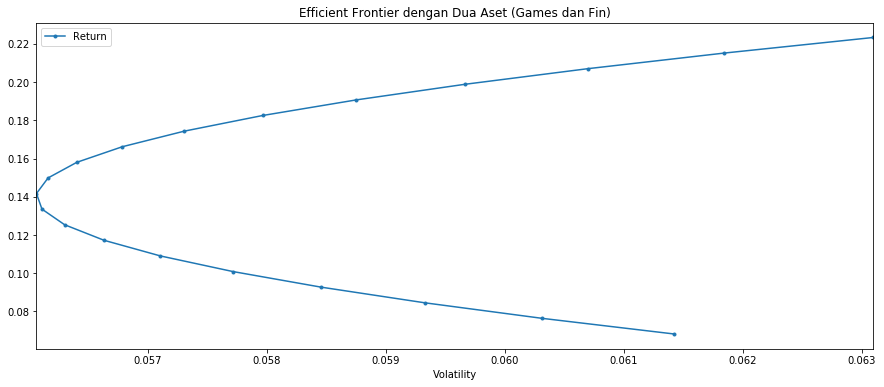

In [14]:
ef.plot.line(x='Volatility', y='Return', 
             title='Efficient Frontier dengan Dua Aset ({} dan {})'.format(assets[0], assets[1]),
             figsize=(15,6), style='.-')

Done! Kita telah menggambar *efficient frontier* untuk 2 aset.

## Praktek *Efficient Frontier* untuk Beberapa Aset

Garis besar langkah-langkahnya kurang lebih adalah sebagai berikut:
- kita tahu return terkecil dari portfolio adalah kalau 100% alokasi diberikan kepada aset dengan return terkecil, dan return terbesar dari portfolio adalah kalau 100% alokasi diberikan kepada aset dengan return terbesar. Maka return terkecil dan terbesar ini adalah titik awal dan akhir dari kurva EF kita (return terkecil adalah ujung bawah kurva, return terbesar adalah ujung atas kurva). Contoh:
  - misalnya return terkecil diberikan oleh aset A yaitu sebesar 10% dan return terbesar diberikan oleh aset B yaitu 90%.
- lalu kita bagi *range* dari return terendah-tertinggi di atas menjadi beberapa bagian (`n_points`). Contoh:
  - misalnya kita bagi menjadi 20 bagian (`n_points=20`), maka kita akan mempunyai list dengan isi 20 element, mulai dari return terendah yaitu 10% sampai tertinggi yaitu 90%: `[10.0, 14.2, 18.4, ..., 85.8, 90.0]`
- tiap-tiap bagian merepresentasikan suatu *return* tertentu. Untuk setiap return ini, kita akan mencari alokasi (*weights*) yang tepat yang dapat memberikan volatilitas yang terendah. Proses ini dilakukan di fungsi `minimize_vol()` di bawah. Fungsi ini memanggil fungsi [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) yang disediakan oleh pustaka `scipy.optimize`.
- pada akhir iterasi, kita mendapatkan kombinasi *weights* yang tepat yang memberikan volatilitas terendah untuk setiap *return* pada *slice* yang kita tentukan di atas.
- dengan *weights* itu, kita bisa hitung volatilitas dari portfolio dengan memanggil `portfolio_vol()`, dan juga returnnya dengan memanggil `portfolio_return()`.
- dengan return dan volatilitas di tangan, kita bisa membuat grafik *efficient frontier*.

Kali ini langsung akan saya copy-paste kodenya dari lab MOOC [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python) minggu kedua.

In [15]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x


def optimal_weights(n_points, er, cov):
    """
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights


def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns", style='.-', 
                      label='Efficient Frontier', legend=True, figsize=(15,6))
    ax.set_ylabel('Returns')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    return ax

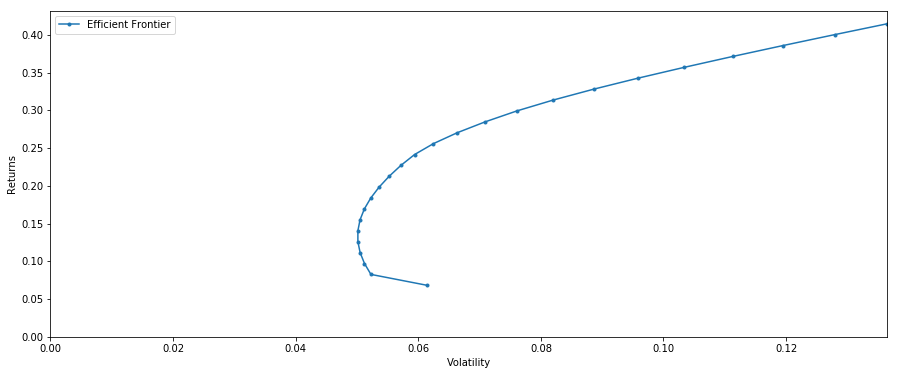

In [32]:
assets = ['Smoke', 'Fin', 'Games', 'Coal']
plot_ef(25, er[assets], cov.loc[assets, assets])

Whoa! It works!

# Capital Market Line (CML)

*Capital Market Line* (CML) adalah kurva yang menggambarkan grafik resiko vs *return* dari portfolio yang merupakan gabungan dari *risk free asset* dan *risky asset*. Garis CML menggambarkan *return* dari portfolio yang naik seiring dengan ditambahkannya *risky asset* dalam portfolio, seperti dalam grafik di bawah ini.

![Capital Market Line](10021-capital-market-line.png)

Pada alokasi yang optimal antara *risk free* dan *risky asset*, portfolio akan menghasilkan nilai Sharpe Ratio yang optimal. Titik ini adalah persinggungan antara kurva *Capital Market Line* dan *Efficient Frontier*, seperti terlihat dalam gambar di bawah.

![Capital Market Line EF](10021-capital-market-line-ef.png)

Dan titik-titik dalam garis CML adalah kurva risk-return yang optimal untuk portolio yang merupakan perpaduan antara *risk free asset* dan *risky asset*.

## Praktek: Mencari Titik Maximum Sharpe Ratio (MSR)

Fungsi di bawah mencari titik MSR dan menggambarkannya ke grafik EF.

In [45]:
# Credit: Vijay Vaidyanathan
# https://www.coursera.org/learn/introduction-portfolio-construction-python
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

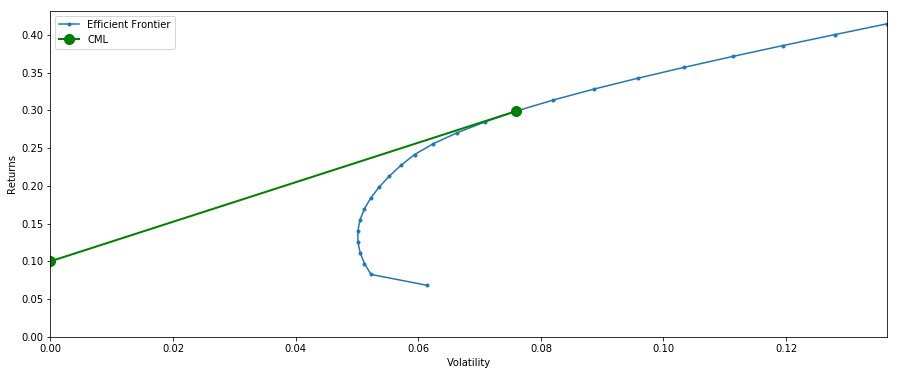

In [43]:
def plot_cml(ax, riskfree_rate, w_msr, er, cov):
    r = portfolio_return(w_msr, er)
    vol = portfolio_vol(w_msr, cov)

    x = [0, vol]
    y = [riskfree_rate, r]
    ax.plot(x, y, color='green', marker='o', label='CML',
            linestyle='-', linewidth=2, markersize=10)
    ax.legend()

RISKFREE_RATE = 0.10
ax = plot_ef(25, er[assets], cov.loc[assets, assets])
w_msr = msr(RISKFREE_RATE, er[assets], cov.loc[assets, assets])
plot_cml(ax, RISKFREE_RATE, w_msr, er[assets], cov.loc[assets, assets])

## Kelemahan *Efficient Frontier*

Walaupun pada awalnya *Efficient frontier* terlihat sangat menjanjikan, ternyata kemudian diketahui bahwa pendekatan ini mempunyai kelemahan yang cukup fatal, yang bahkan membuatnya kurang layak (*feasible*) untuk dipakai. Kelemahannya adalah, EF membutuhkan nilai *expected return* yang akurat, dan sedikit perbedaan pada nilai *expected return* akan menyebabkan perubahan yang drastis pada alokasi terhadap aset-asetnya.

Yuk kita demonstrasikan berikut. Agar sederhanan kita pakai dua aset saja.

In [35]:
assets = ['Food', 'Steel']

Expected return dari kedua asset di atas adalah:

In [36]:
er[assets]

Food     0.116799
Steel    0.115809
dtype: float64

MSR untuk dua asset di atas adalah:

In [37]:
msr(RISKFREE_RATE, er[assets], cov.loc[assets, assets])

array([0.75040362, 0.24959638])

Jadi alokasi yang optimal adalah Food 75% dan Steel 25%.

Sekarang mari kita lihat perubahan pada alokasi aset kalau *expected return* dari asetnya kita rubah sedikit.

In [38]:
msr(RISKFREE_RATE, np.array([0.11, 0.12]), cov.loc[assets, assets])

array([0.57930354, 0.42069646])

Maka prosentase alokasinya sudah berubah jauh. Padahal perubahannya tidak sampai 1%. 

Sekarang coba kita rubah *expected return*-nya lebih banyak.

In [39]:
msr(RISKFREE_RATE, np.array([0.10, 0.13]), cov.loc[assets, assets])

array([0., 1.])

Wow! Sekarang MSR mengalokasikan 100% ke aset Steel. Demikian juga kalau kita rubah sebaliknya:

In [40]:
msr(RISKFREE_RATE, np.array([0.13, 0.10]), cov.loc[assets, assets])

array([1., 0.])

Maka MSR mengalokasikan 100% ke Food. Padahal perubahannya tidak sampai 2%.

Dalam dunia nyata, kita harus ingat bahwa nilai *expected return* adalah nilai ramalan dari *return* suatu aset untuk periode ke depan. Nilai ini dibuat oleh analis. Kalaupun ada kesalahan 2%, maka di dunia nyata ini sudah merupakan ramalan yang sangat bagus. Namun ternyata hal ini menghasilkan perubahan alokasi yang sangat drastis jika kita memakai MSR.

Oleh karena itu orang kemudian memakai perhitungan alokasi lain, misalnya GMV di bawah ini.

## Global Minimum Variance (GMV) Portfolio

GMV portfolio adalah portfolio dengan volatilitas terendah yang mungkin dicapai dengan mengombinasikan aset-aset yang ada. Dalam grafik EF, titik GMV adalah ujung "hidung" kurva EF, seperti terlihat di bawah.

![Global Minimum Variance](10021-global-minimum-variance.png)

Kelebihan GMV adalah perhitungannya hanya membutuhkan matriks *covariance*, dan tidak membutuhkan *expected return*, sehingga terbebas dari masalah kesalahan pada prediksi *expected return* di atas.

## Menghitung GMV

In [44]:
# Credit: Vijay Vaidyanathan
# https://www.coursera.org/learn/introduction-portfolio-construction-python
def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)


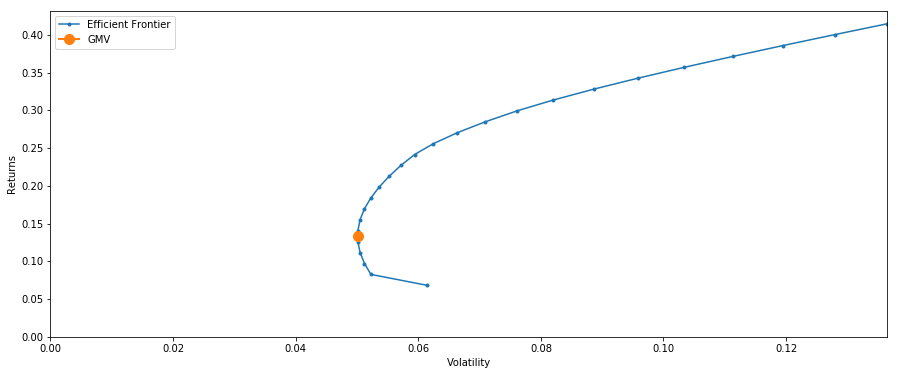

In [46]:
assets = ['Smoke', 'Fin', 'Games', 'Coal']

def plot_point(ax, weights, er, cov, label, color='C1'):
    r = portfolio_return(weights, er)
    vol = portfolio_vol(weights, cov)

    x = [vol]
    y = [r]
    ax.plot([vol], [r], color=color, marker='o', label=label,
            linestyle='-', linewidth=2, markersize=10)
    ax.legend()

ax = plot_ef(25, er[assets], cov.loc[assets, assets])
w_gmv = gmv(cov.loc[assets, assets])
plot_point(ax, w_gmv, er[assets], cov.loc[assets, assets], 'GMV')

## Alokasi Seimbang

Sebagai pelengkap, kita gambarkan titik risk/return jika kita mengalokasikan aset secara merata.

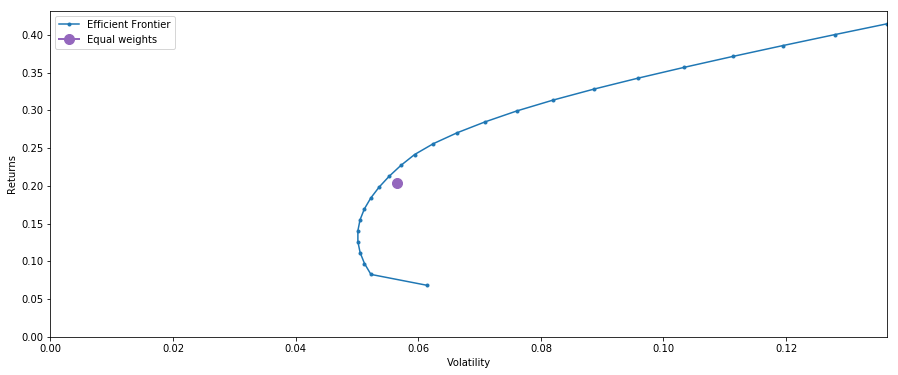

In [50]:
n_assets = len(assets)
ax = plot_ef(25, er[assets], cov.loc[assets, assets])
w_ew = np.repeat(1/n_assets, n_assets)
plot_point(ax, w_ew, er[assets], cov.loc[assets, assets], 'Equal weights', color='C4')